C:\Users\Dublin\AppData\Local\Temp\ipykernel_47672\799601420.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow_r')  # Use the rainbow color map


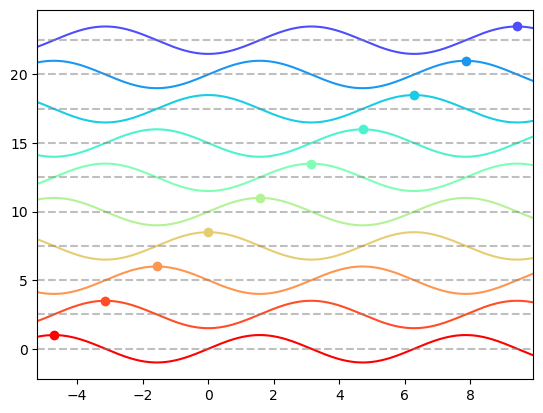

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

x = np.arange(-10,10, 0.01)
pi = np.pi

plist = range(0,10)
# Create a color map
cmap = cm.get_cmap('rainbow_r')  # Use the rainbow color map
norm = Normalize(vmin=0, vmax=len(plist))



for i, p in enumerate(plist):
    py = 2.5*p
    plt.plot(x, np.sin(x - p*np.pi/2)+ py, color=cmap(norm(i)))
    plt.axhline(py, color = "grey", alpha = 0.5, ls = "--")
    plt.scatter(p*np.pi/2 - 3*pi/2, py + 1, color=cmap(norm(i)), zorder = 5)
    
# for p in plist: 
#     py = 2.5*p
#     plt.scatter(p*np.pi/2 - 3*pi/2, py + 1, color = "black", zorder = 5)

offset = 0.5
plt.xlim(-3*pi/2-offset, 3*pi + offset)
plt.savefig("stacked sines.svg")

In [49]:
import numpy as np
from mayavi import mlab

bgc = 1
fig = mlab.figure(bgcolor=(bgc, bgc, bgc), size = (2000, 2000))
# Define parameters for the torus
R = 3
r = 1.2
pi = np.pi
cos = np.cos
sin = np.sin
dphi = pi/50
phi = np.arange(0.0, 2*pi + 0.5*dphi, dphi, 'd')
mu = np.arange(0, 2*pi + 0.5*dphi, dphi, 'd')

# Create the x, y, and z coordinates of the points
phi, mu = np.meshgrid(phi, mu)  # Create 2D arrays for phi and mu
x = cos(phi) * (R + r*cos(mu))
y = sin(phi) * (R + r*cos(mu))
z = r * sin(mu)

# Create a scalar field for color mapping
s = np.sin(mu)

meshcolor = 0.5
# Create and visualize the mesh
mesh = mlab.mesh(x, y, z, scalars=None, opacity=0.5, color = (meshcolor, meshcolor, meshcolor))

greyness = 0.5
# Create a grid on the surface of the torus
# grid = mlab.pipeline.surface(mesh, representation='wireframe', color= (1,1,1), opacity = 0.05)

theta = np.linspace(0, 2.*np.pi, 1000)  # angle variable
offset = 0  # adjust this value to bring the tube closer or further from the torus

wrap_factor = 10 # adjust this value to control the number of wraps around the small radius
cx = (R - offset + r * cos(wrap_factor * theta)) * cos(theta)  # x-coordinates of the curve
cy = (R - offset + r * cos(wrap_factor * theta)) * sin(theta)  # y-coordinates of the curve
cz = r * sin(wrap_factor * theta)  # z-coordinates of the curve

# Create a scalar field for the line color mapping
line_s = np.sin(theta/4)

# Create and visualize the line
line = mlab.plot3d(cx, cy, cz, line_s, tube_radius=0.01, colormap='rainbow')

mlab.show()
